## Import Library

In [ ]:
!pip install textblob deep-translator --quiet
import pandas as pd
import numpy as np
import time
from textblob import TextBlob
from deep_translator import GoogleTranslator
from tqdm import tqdm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 3.7 MB/s eta 0:00:00


## TextBlob Sentiment Polarity Analysis

In [ ]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Pastikan resource NLTK terunduh
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

# Baca dataset
df_article = pd.read_csv("cleaned_jaklingko_text_final.csv")

# Gunakan hanya kolom 'Content'
df_article = df_article.rename(columns={'Content': 'article_text'})
df_article = df_article.dropna(subset=['article_text']).reset_index(drop=True)

print("Jumlah artikel:", len(df_article))
df_article.head()


Jumlah artikel: 156


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,No,Title,Source,Date,URL,article_text,cleaned_text,tokens,stemmed_tokens,stemmed_text
0,1,"Nasib Sopir Jaklingko, Saat Tarikan Gas tak Se...",https://www.republika.id,08/06/2025,https://www.republika.id/posts/58688/nasib-sop...,"REPUBLIKA.ID, JAKARTA — Sudah tiga bulan, Didi...",republika id jakarta sudah tiga bulan didin bu...,"['republika', 'jakarta', 'didin', 'nama', 'tra...","['republika', 'jakarta', 'din', 'nama', 'train...",republika jakarta din nama trainee sopir mikro...
1,2,"Naik MRT, KRL, Transjakarta, hingga JakLingko ...",https://nasional.kompas.com,08/01/2025,https://nasional.kompas.com/read/2025/08/01/11...,"JAKARTA, KOMPAS.com - Pemerintah menetapkan di...",jakarta kompas com pemerintah menetapkan disko...,"['jakarta', 'kompas', 'com', 'pemerintah', 'me...","['jakarta', 'kompas', 'com', 'pemerintah', 'te...",jakarta kompas com pemerintah tetap diskon tar...
2,3,"Dilema Hadirnya Jaklingko, Sopir Angkot Regula...",https://wartakota.tribunnews.com,09/27/2025,https://wartakota.tribunnews.com/jakarta/86893...,"WARTAKOTALIVE.COM, JAKARTA -Hadirnya Jaklingko...",wartakotalive com jakarta hadirnya jaklingko s...,"['wartakotalive', 'com', 'jakarta', 'hadirnya'...","['wartakotalive', 'com', 'jakarta', 'hadir', '...",wartakotalive com jakarta hadir jaklingko angk...
3,4,Seluruh Layanan TransJakarta dan Jaklingko Dih...,https://www.metrotvnews.com,08/30/2025,https://www.metrotvnews.com/read/b3JCpLJq-selu...,Jakarta: Seluruh layanan TransJakarta dan Jakl...,jakarta seluruh layanan transjakarta dan jakli...,"['jakarta', 'layanan', 'transjakarta', 'jaklin...","['jakarta', 'layanan', 'transjakarta', 'jaklin...",jakarta layanan transjakarta jaklingko henti h...
4,5,Pemkot Tangerang Dukung Rencana Perpanjangan R...,https://www.tangerangkota.go.id,04/10/2025,https://www.tangerangkota.go.id/berita/detail/...,Pemerintah Kota (Pemkot) Tangerang menyambut b...,pemerintah kota pemkot tangerang menyambut bai...,"['pemerintah', 'kota', 'pemkot', 'tangerang', ...","['pemerintah', 'kota', 'pemkot', 'tangerang', ...",pemerintah kota pemkot tangerang sambut rencan...


In [ ]:
# Fungsi translasi (aman & stabil)
def translate_text(text):
    try:
        return GoogleTranslator(source='auto', target='en').translate(text)
    except Exception as e:
        print("⚠️ Terjemahan gagal:", e)
        return text

# Potong teks panjang
def split_text_into_batches(text, max_words=500):
    if not isinstance(text, str):
        return []
    words = text.split()
    return [' '.join(words[i:i + max_words]) for i in range(0, len(words), max_words)]

# Fungsi sentiment
def get_sentiment_polarity_long(text):
    if not isinstance(text, str) or text.strip() == "":
        return 0.0

    batches = split_text_into_batches(text)
    polarities = []

    for batch in batches:
        try:
            eng_text = translate_text(batch)
            blob = TextBlob(eng_text)
            scores = [s.sentiment.polarity for s in blob.sentences]
            if scores:
                polarities.append(np.mean(scores))
            time.sleep(0.3)
        except Exception as e:
            print("⚠️ Gagal proses batch:", e)
            continue

    return np.mean(polarities) if polarities else 0.0

# Jalankan ke seluruh artikel
df_article = df_article.dropna(subset=['cleaned_text'])
df_article['polarity'] = df_article['cleaned_text'].apply(get_sentiment_polarity_long)
df_article['sentiment'] = df_article['polarity'].apply(lambda x: 'positive' if x > 0 else 'negative')

print("✅ Analisis sentimen selesai!")
print(df_article[['cleaned_text', 'polarity', 'sentiment']].head(5))


✅ Analisis sentimen selesai!
                                        cleaned_text  polarity sentiment
0  republika id jakarta sudah tiga bulan didin bu...  0.050000  positive
1  jakarta kompas com pemerintah menetapkan disko...  0.128977  positive
2  wartakotalive com jakarta hadirnya jaklingko s...  0.001058  positive
3  jakarta seluruh layanan transjakarta dan jakli... -0.020100  negative
4  pemerintah kota pemkot tangerang menyambut bai...  0.057143  positive


## Content Labeling


In [ ]:
# ============================================================
# CONTENT LABELING UNTUK ARTIKEL BERITA JAKLINGKO
# ============================================================

from tqdm import tqdm

# Pastikan kolom teks yang digunakan
text_col = "cleaned_text" if "cleaned_text" in df_article.columns else "article_text"

# Daftar kata kunci untuk setiap kategori
POLICY_KEYWORDS = [
     "program", "kebijakan","resmi", "subsidi", "regulasi", "aturan", "rapat", "peraturan",
    "proyek", "inisiatif", "penegakan", "strategi", "pengumuman resmi"
]

OPINION_KEYWORDS = [
    "menurut", "pendapat", "berpendapat", "opini", "menilai", "keluhan",
    "berharap", "menganggap", "sebaiknya", "harusnya", "perlu", "kritik",
    "saran", "setuju", "tidak setuju", "sayangnya", "pandangan",
    "masyarakat", "warga", "penumpang", "pengguna", "sopir", "mengaku"
]

NEWS_KEYWORDS = [
    "dilaporkan", "terjadi", "menyampaikan", "berdasarkan", "laporan",
    "lokasi", "kejadian", "mengalami", "menyebutkan", "melaporkan",
    "mengumumkan", "informasi", "berlangsung", "ditemukan", "update",
    "data", "jumlah", "tarif", "operasional", "layanan", "rute", "transjakarta",
    "angkutan", "transportasi", "penumpang"
]

# Fungsi klasifikasi berbasis konteks dan prioritas
def classify_content(text):
    text = str(text).lower().strip()

    # Urutan prioritas penting: policy > opinion > news
    if any(keyword in text for keyword in POLICY_KEYWORDS):
        return "policy"
    elif any(keyword in text for keyword in OPINION_KEYWORDS):
        return "opinion"
    else:
        return "news"

# Proses labeling dengan progress bar
tqdm.pandas(desc="Melakukan Content Labeling")
df_article["content_label"] = df_article[text_col].progress_apply(classify_content)

# ============================================================
# LIHAT HASILNYA
# ============================================================

print("\nDistribusi Label Konten:")
print(df_article["content_label"].value_counts())

print("\nContoh Hasil Content Labeling:")
display(df_article[["Title", text_col, "content_label"]].head(10))


Melakukan Content Labeling: 100%|██████████| 156/156 [00:00<00:00, 34339.85it/s]


Distribusi Label Konten:
content_label
policy     86
opinion    63
news        7
Name: count, dtype: int64

Contoh Hasil Content Labeling:


,Title,cleaned_text,content_label
0,"Nasib Sopir Jaklingko, Saat Tarikan Gas tak Se...",republika id jakarta sudah tiga bulan didin bu...,opinion
1,"Naik MRT, KRL, Transjakarta, hingga JakLingko ...",jakarta kompas com pemerintah menetapkan disko...,policy
2,"Dilema Hadirnya Jaklingko, Sopir Angkot Regula...",wartakotalive com jakarta hadirnya jaklingko s...,policy
3,Seluruh Layanan TransJakarta dan Jaklingko Dih...,jakarta seluruh layanan transjakarta dan jakli...,policy
4,Pemkot Tangerang Dukung Rencana Perpanjangan R...,pemerintah kota pemkot tangerang menyambut bai...,policy
5,"Naik Angkot Jaklingko Gratis Itu Menyenangkan,...",mojok co semoga suatu saat nanti naik jaklingk...,opinion
6,Pramono Wanti-wanti Sopir Jaklingko Ugal-ugala...,gubernur jakarta pramono anung mengungkap adan...,opinion
7,Pramono Ingin Mikrotrans JakLingko Beroperasi ...,tempo co jakarta gubernur jakarta pramono anun...,policy
8,Operasional TransJakarta dan Jaklingko Hampir ...,bola com jakarta sejak minggu pagi hari hampir...,opinion
9,"Usai Transjabodetabek, Pramono Bakal Perluas J...",jakarta kompas com gubernur jakarta pramono an...,policy


## Save to CSV and Excel

In [ ]:
!pip install xlsxwriter --quiet

# Urutan kolom sesuai kebutuhan
final_cols = [
    'No', 'Title', 'Source', 'Date', 'URL',
    'article_text', 'cleaned_text',
    'tokens', 'stemmed_tokens', 'stemmed_text',
     'sentiment', 'content_label'
]

# Pastikan hanya kolom yang tersedia di DataFrame yang disertakan
available_cols = [c for c in final_cols if c in df_article.columns]

# Tentukan nama file output
output_path = "jaklingko_text_final.xlsx"

# Simpan ke format Excel dengan encoding aman
with pd.ExcelWriter(output_path, engine='xlsxwriter') as writer:
    df_article[available_cols].to_excel(writer, index=False, sheet_name='JakLingko_Dataset')

print("✅ File 'jaklingko_text_final.xlsx' berhasil disimpan!")
print(f"Kolom disertakan: {available_cols}")
print(f"Total artikel tersimpan: {len(df_article)}")

✅ File 'jaklingko_text_final.xlsx' berhasil disimpan!
Kolom disertakan: ['No', 'Title', 'Source', 'Date', 'URL', 'article_text', 'cleaned_text', 'tokens', 'stemmed_tokens', 'stemmed_text', 'sentiment', 'content_label']
Total artikel tersimpan: 156


In [ ]:
# Urutan kolom sesuai permintaan
final_cols = [
    'No', 'Title', 'Source', 'Date', 'URL',
    'article_text', 'cleaned_text',
    'tokens', 'stemmed_tokens', 'stemmed_text',
    'polarity', 'sentiment', 'content_label'
]


# Cek kolom yang tersedia di DataFrame kamu
available_cols = [c for c in final_cols if c in df_article.columns]

# Simpan ke file CSV dengan encoding aman untuk Excel
df_article[available_cols].to_csv("jaklingko_text_final.csv", index=False, encoding='utf-8-sig')

print("✅ File 'cleaned_jaklingko_text.csv' berhasil disimpan!")
print(f"Kolom disertakan: {available_cols}")
print(f"Total artikel tersimpan: {len(df_article)}")


# Visualisasi Hasil


  sentiment content_label
0   negatif       opinion
1   positif        policy
2   negatif       opinion
3   negatif        policy
4   positif        policy


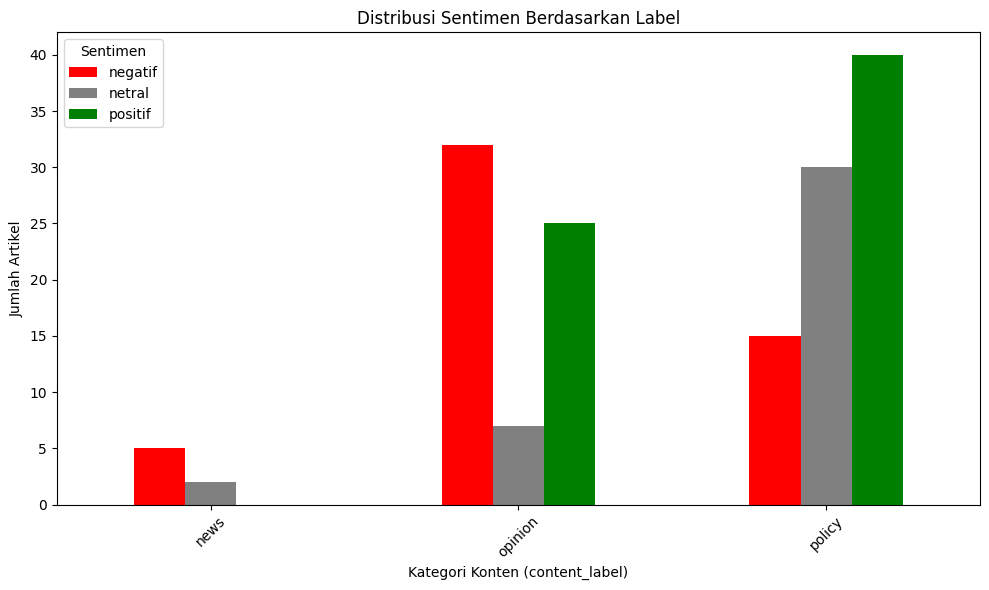

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Baca file Excel
df = pd.read_excel("02_jaklingko_final.xlsx")

# 2. Lihat isi kolom untuk memastikan
print(df[['sentiment', 'content_label']].head())

# 3. Hitung jumlah data berdasarkan kombinasi sentiment dan content_label
count_data = df.groupby(['content_label', 'sentiment']).size().unstack(fill_value=0)

# 4. Buat visualisasi (bar chart) dengan warna khusus per sentimen
colors = {
    'negatif': 'red',
    'netral': 'gray',
    'positif': 'green'
}

count_data.plot(kind='bar', figsize=(10,6), color=[colors[col] for col in count_data.columns])

# 5. Tambahkan judul dan label
plt.title('Distribusi Sentimen Berdasarkan Label')
plt.xlabel('Kategori Konten (content_label)')
plt.ylabel('Jumlah Artikel')
plt.legend(title='Sentimen')
plt.xticks(rotation=45)
plt.tight_layout()

# 6. Tampilkan grafik
plt.show()


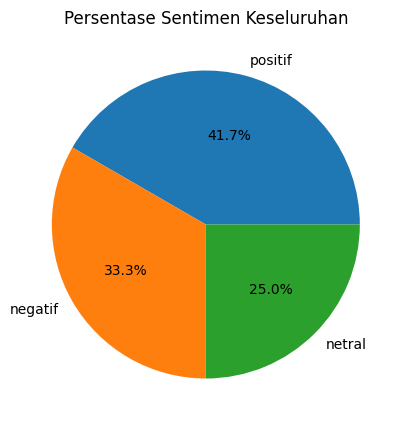

In [10]:
# Pie chart total sentimen
df['sentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(5,5))
plt.title('Persentase Sentimen Keseluruhan')
plt.ylabel('')
plt.show()


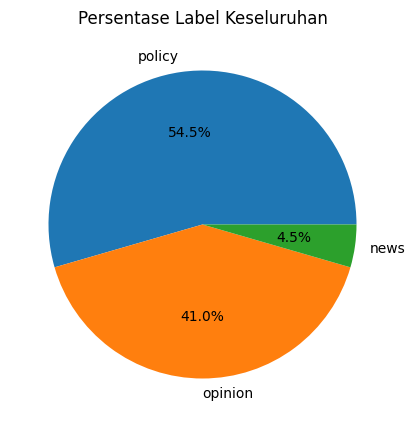

In [11]:
# Pie chart opini
df['content_label'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(5,5))
plt.title('Persentase Label Keseluruhan')
plt.ylabel('')
plt.show()